# COMSOL: Electron suppression electrode design - ELECTRONS

- For two types of suppression electrode dsigns which differ in the distance between the surface of the target and the inner surface of the suppression electrode the path of the electrons is simulated

- Electron starting position is offset by 0.05 mm from the surface of the target (preventing the electrons to get "stuck"). Starting position is sampled as the position of the beam spot on the target in COMSOL simulation 04.suppr_elec.3D.009.particleData.csv. The code to generate the electron release grid position file is in 02_PhD/01.github/phd/03_COMSOL/03_BeamOptics/07.electrons/07.electrons.releaseFromGridToCOMSOL.ipynb.

- The starting kinetic energy of the electrons is between 100 eV and 750 eV. From SRIM, one finds that the energy of the recoil ions is in the order of tens of eV, even if all this energy is transferred to the electrons this provides some safety margin. But it is still an assumption

- Bias voltage is 1000 V higher (negatively) compared to the target


In [3]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import os
import matplotlib
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [85]:
folder_w_datafiles = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/05.electrons/particleData/'
regex_datafiles = '05.electrons.(\d*).(\d*)V.(\d*)eV.particleData.csv'
output_folder = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/05.electrons/plots/'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

files = os.listdir(folder_w_datafiles)
files = [f for f in files if len(re.findall(regex_datafiles, f))>0]
files = [f'{folder_w_datafiles}/{f}' for f in files]
files

['/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/05.electrons/particleData//05.electrons.005.1000V.750eV.particleData.csv',
 '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/05.electrons/particleData//05.electrons.004.1000V.500eV.particleData.csv',
 '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/05.electrons/particleData//05.electrons.005.1000V.500eV.particleData.csv',
 '/Users/hkromer/02_PhD/02_Data/01_COMSOL/01_IonOptics/03.new_chamber/05.electrons/particleData//05.electrons.004.1000V.750eV.particleData.csv']

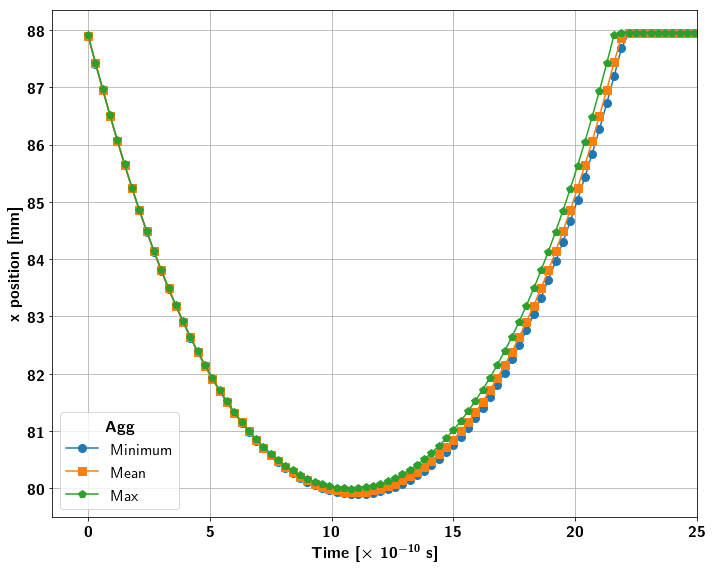

'05.electrons.005.1000V.750eV.particleData'

In [94]:
file = files[0]

# clean up the columns of the datafile
# find column headers
c = []
with open(file, 'r') as myfile:
    for line in myfile:
        if 'Index' in line:
#             print(line)
#             l = re.sub(r'(=\d\.\d\w\-\d)(,)', r'\1 @ ', line) # t=1.1E-1
            l = line.rstrip().split(',')
            c.append(l)
            break

myfile.close()
cols = c[0]
 
# import the datafile with correct columns
df = pd.read_csv(file, skiprows=8, header=None)
df.columns = cols

# select the qx position entry
cols_qx = [col for col in df.columns if 'qx' in col]
df_qx = df[cols_qx]

# replace the column header with the timestamp
df_qx.columns = [re.findall(r'@ t=(.*)', col)[0] for col in df_qx.columns]

# make column header the index
df_qx = df_qx.T
df_qx.index = df_qx.index.astype(float)  # convert to float

# plot minimum qx position, average and max qx position entry for each timestep versus the time
fs = 16
ls = 16
ms = 8
markers = ['o', 's', 'p']

plt.figure(figsize=(10,8))

x = df_qx.index * 1e10  # convert to e-10 seconds for better ticks
y_min = df_qx.min(axis=1).values
y_mean = df_qx.mean(axis=1).values
y_max = df_qx.max(axis=1).values

# with markers 
plt.plot(x, y_min, marker=markers[0], markersize=ms, label='Minimum')
plt.plot(x, y_mean, marker=markers[1], markersize=ms, label='Mean')
plt.plot(x, y_max, marker=markers[2], markersize=ms, label='Max')

# without markers
# plt.plot(x, y_min, marker=None, markersize=ms, label='Minimum')
# plt.plot(x, y_mean, marker=None, markersize=ms, label='Mean')
# plt.plot(x, y_max, marker=None, markersize=ms, label='Max')

ax = plt.gca()
handles,labels = ax.get_legend_handles_labels()
legend = ax.legend(handles,labels,title=r'\textbf{Agg}',loc='best', fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)

# plt.ylim(79.8, 80.2)
xlims = ax.get_xlim()
plt.xlim(xlims[0], 25)



ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
plt.grid()
plt.xlabel(r'\textbf{Time [$\times$ 10$^{-10}$ s]}', fontsize=fs)
plt.ylabel(r'\textbf{x position [mm]}', fontsize=fs)
plt.tight_layout()
fname = re.findall(r'([^/]+).csv', file)[0]

plt.savefig(f'{output_folder}/{fname}.pdf')
plt.show()

print(fname)

## Loop over all files

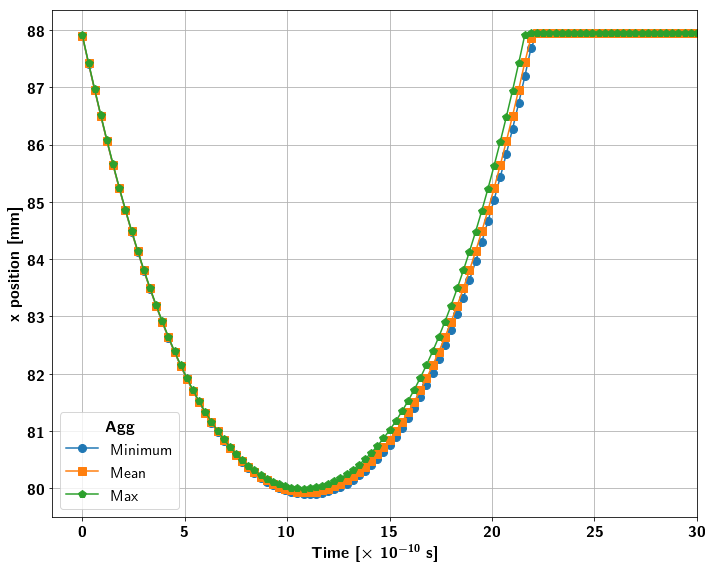

05.electrons.005.1000V.750eV.particleData


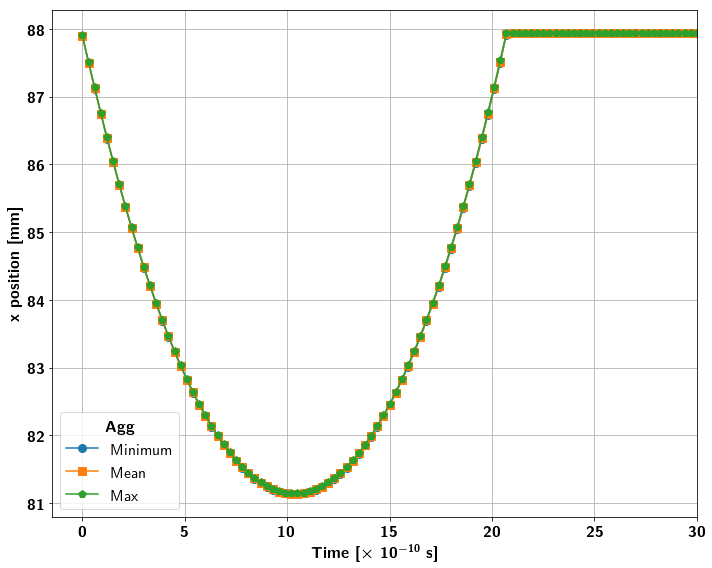

05.electrons.004.1000V.500eV.particleData


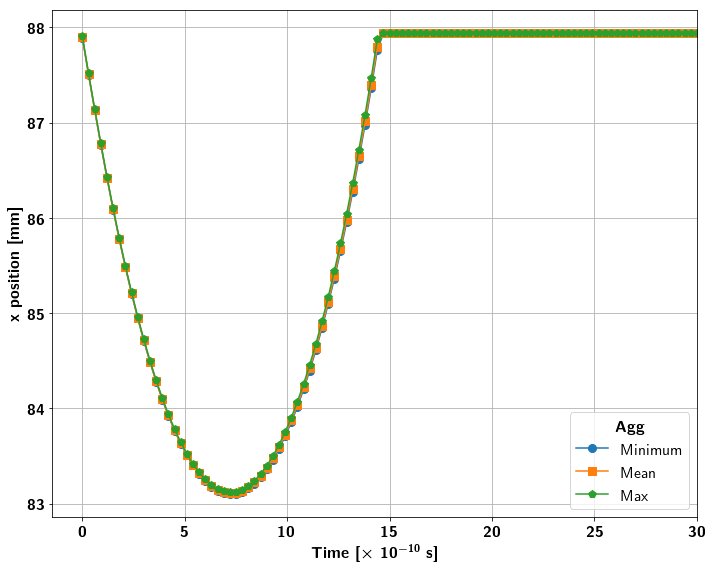

05.electrons.005.1000V.500eV.particleData


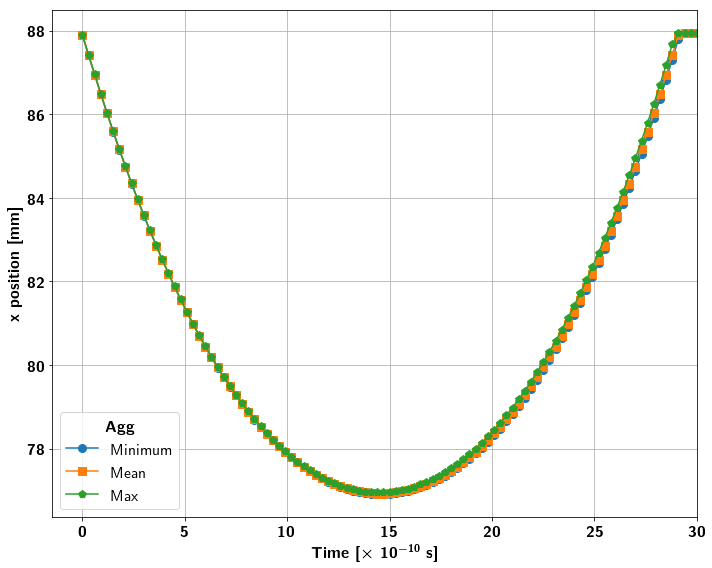

05.electrons.004.1000V.750eV.particleData


In [97]:
for file in files:
    # clean up the columns of the datafile
    # find column headers
    c = []
    with open(file, 'r') as myfile:
        for line in myfile:
            if 'Index' in line:
    #             print(line)
    #             l = re.sub(r'(=\d\.\d\w\-\d)(,)', r'\1 @ ', line) # t=1.1E-1
                l = line.rstrip().split(',')
                c.append(l)
                break

    myfile.close()
    cols = c[0]

    # import the datafile with correct columns
    df = pd.read_csv(file, skiprows=8, header=None)
    df.columns = cols

    # select the qx position entry
    cols_qx = [col for col in df.columns if 'qx' in col]
    df_qx = df[cols_qx]

    # replace the column header with the timestamp
    df_qx.columns = [re.findall(r'@ t=(.*)', col)[0] for col in df_qx.columns]

    # make column header the index
    df_qx = df_qx.T
    df_qx.index = df_qx.index.astype(float)  # convert to float

    # plot minimum qx position, average and max qx position entry for each timestep versus the time
    fs = 16
    ls = 16
    ms = 8
    markers = ['o', 's', 'p']

    plt.figure(figsize=(10,8))

    x = df_qx.index * 1e10  # convert to e-10 seconds for better ticks
    y_min = df_qx.min(axis=1).values
    y_mean = df_qx.mean(axis=1).values
    y_max = df_qx.max(axis=1).values

    # with markers 
    plt.plot(x, y_min, marker=markers[0], markersize=ms, label='Minimum')
    plt.plot(x, y_mean, marker=markers[1], markersize=ms, label='Mean')
    plt.plot(x, y_max, marker=markers[2], markersize=ms, label='Max')

    # without markers
    # plt.plot(x, y_min, marker=None, markersize=ms, label='Minimum')
    # plt.plot(x, y_mean, marker=None, markersize=ms, label='Mean')
    # plt.plot(x, y_max, marker=None, markersize=ms, label='Max')

    ax = plt.gca()
    handles,labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles,labels,title=r'\textbf{Agg}',loc='best', fontsize=fs)
    plt.setp(legend.get_title(),fontsize=fs)

    # plt.ylim(79.8, 80.2)
    xlims = ax.get_xlim()
    plt.xlim(xlims[0], 30)



    ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
    plt.grid()
    plt.xlabel(r'\textbf{Time [$\times$ 10$^{-10}$ s]}', fontsize=fs)
    plt.ylabel(r'\textbf{x position [mm]}', fontsize=fs)
    plt.tight_layout()
    fname = re.findall(r'([^/]+).csv', file)[0]

    plt.savefig(f'{output_folder}/{fname}.pdf')
    plt.savefig(f'{output_folder}/{fname}.png', dpi=900)
    plt.show()

    print(fname)